## Fashion Mnist

- Fecha: 2024-07-30
- Coder: Lenin G. Falconí
- Objetivo: leer el dataset de Fashion Mnist para un ejemplo sencillo de entrenamiento de red neuronal. Los archivos vienen en formato ubyte

In [4]:
import os
path_train = os.path.join(os.getcwd(), 'Train/')
path_test = os.path.join(os.getcwd(), 'Test/')
print(f"Archivos de entrenamiento: {os.listdir(path_train)}")
print(f"Archivos de testeo: {os.listdir(path_test)}")

Archivos de entrenamiento: ['train-images-idx3-ubyte', 'train-labels-idx1-ubyte']
Archivos de testeo: ['t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte']


## Carga de Datos de Entrenamiento y Prueba
Se procede a utilizar la librería idx2numpy para cargar la información desde el archivo ubyte. Para esto installe la librería usando el comando:`pip install idx2numpy`

In [6]:
import idx2numpy
Xtrain = idx2numpy.convert_from_file(os.path.join(path_train, 'train-images-idx3-ubyte'))
Xtest = idx2numpy.convert_from_file(os.path.join(path_test, 't10k-images-idx3-ubyte'))
ytrain = idx2numpy.convert_from_file(os.path.join(path_train, 'train-labels-idx1-ubyte'))
ytest = idx2numpy.convert_from_file(os.path.join(path_test, 't10k-labels-idx1-ubyte'))

Verificando que las dimensiones de los tensores sean coherentes. Se puede verificar que el dataset de entrenamiento está formado por las imágenes $\mathcal{X}$, que es un tensor de 60000 imágenes de $28 \times 28$ y las etiquetas $\mathcal{Y}$ con 60000 muestras  

In [10]:
Xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [11]:
Xtest.shape, ytest.shape

((10000, 28, 28), (10000,))

## Gráfica de Ejemplos del Dataset

Se procede a realizar una gráfica en una matriz de $3\times 3$ de ejemplos aleatorios del dataset de entrenamiento para verificar las imágenes que dispone el dataset junto con sus etiquetas

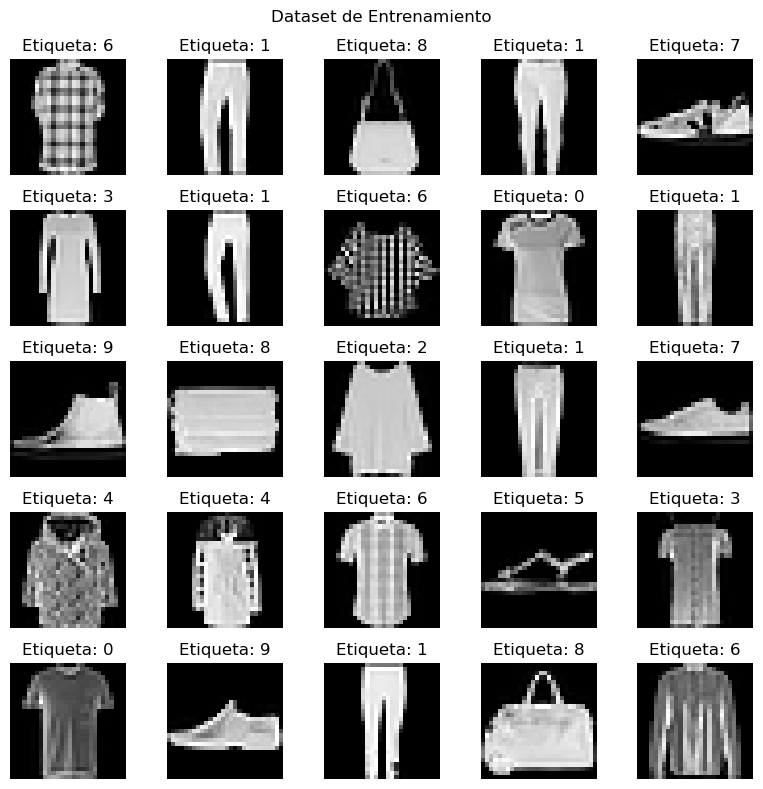

In [22]:
import matplotlib.pyplot as plt
import numpy as np
random_idx = np.random.choice(len(Xtrain), size=25, replace=False)

# creando la malla de 3x3
fig, axes = plt.subplots(5,5, figsize=(8,8))
fig.suptitle("Dataset de Entrenamiento")

for i, ax in enumerate(axes.flat):
    image = Xtrain[random_idx[i]]
    label = ytrain[random_idx[i]]
    ax.imshow(image, cmap='grey')
    ax.set_title(f"Etiqueta: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [23]:
random_idx

array([43210, 46105, 53232, 48060, 19630, 15396, 46893,  6382, 54603,
       55843, 40276, 34870, 35561, 14696, 45248, 22133, 32879, 29616,
       14098,  3870, 57623, 30185, 15974, 44508, 20358])

Los nombres de las etiquetas del dataset se pueden tener como

| Etiqueta | Clase|
|----------|------|
|0|T-shirt/Top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle Boot|

In [24]:
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## Red Neuronal Convolucional Sencilla para Clasificación
Este ejercicio plantea utilizar fine tuning de una red pre-entrenada en imagenes naturales para la clasificación de las imágenes del FashionMnist. Se ha de notar que las imágenes del dataset son imágenes en escala de grises

### Preprocesamiento

Las imágenes de entrenamiento y testeo se han de normalizar al rango de 0 a 1

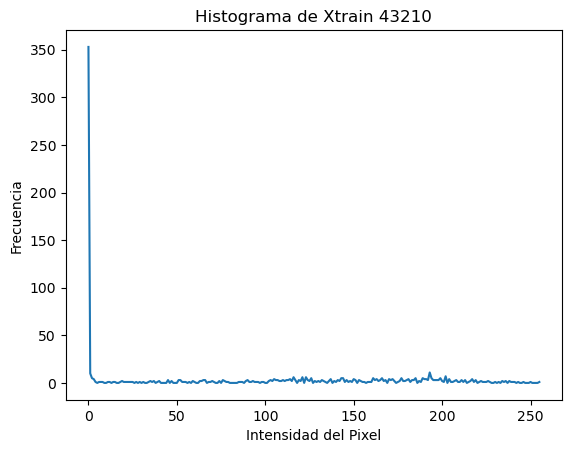

In [25]:
hist, bins = np.histogram(Xtrain[random_idx[0]].ravel(), bins=256, range=(0,256))
plt.plot(hist)
plt.title(f'Histograma de Xtrain {random_idx[0]}')
plt.xlabel('Intensidad del Pixel')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0

## Red Neuronal Shallow

In [29]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

2024-07-30 22:08:11.340640: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 22:08:11.340716: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 22:08:11.340727: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 22:08:11.448351: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 22:08:15.142326: I te

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
history = model.fit(Xtrain, ytrain, epochs=10, verbose=1)

Epoch 1/10


2024-07-30 22:09:11.113494: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-30 22:09:11.270002: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fec55fb0840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-30 22:09:11.270045: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-07-30 22:09:11.298381: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-30 22:09:11.395526: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2024-07-30 22:09:11.595017: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.4949 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3768 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3385 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2483 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2362 - accurac

### Evaluación del modelo Shallow

In [32]:
test_loss, test_acc = model.evaluate(Xtest,  ytest, verbose=2)

print(f'Test accuracy:{test_acc}')
print(f'Test loss:{test_loss}')

313/313 - 1s - loss: 0.3350 - accuracy: 0.8864 - 1s/epoch - 4ms/step
Test accuracy:0.8863999843597412
Test loss:0.33499759435653687


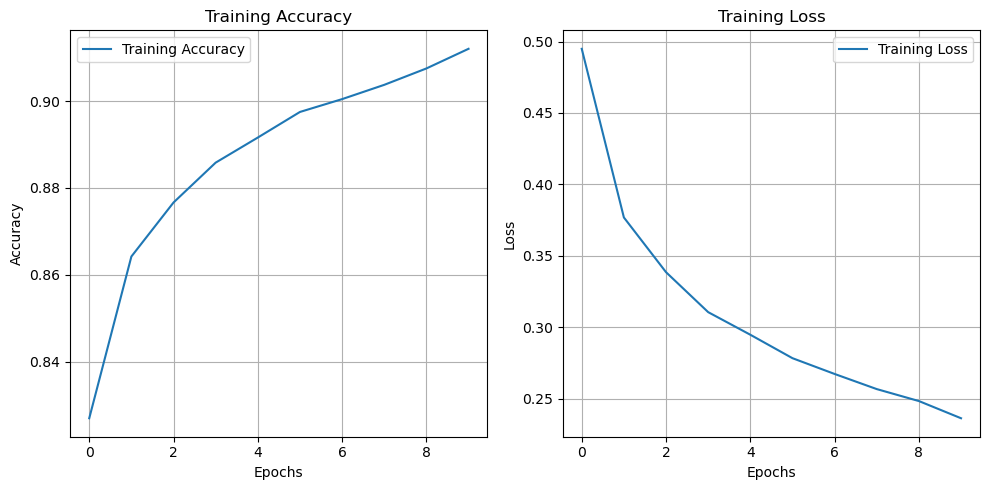

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid()
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()


### Predicciones

Dado que el modelo se encuentra entrenado se procede a realizar predicciones sobre el dataset de pruebas

In [37]:
# convierte las salidas de logits del modelo en probabilidades
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [39]:
yprobability_predictions = probability_model(Xtest)

In [40]:
yprobability_predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.0770493e-08, 1.5805448e-09, 7.6876114e-09, 4.7124626e-10,
       9.4428385e-09, 1.3614864e-03, 1.7845099e-09, 3.9648589e-02,
       1.6675567e-07, 9.5898980e-01], dtype=float32)>

In [41]:
np.argmax(yprobability_predictions[0])

9

In [42]:
y_predict = np.argmax(yprobability_predictions, axis=1)
y_predict[:5]

array([9, 2, 1, 1, 6])

Ahora utilizo el reporte de clasificación para evaluar el rendimiento de la clasificación obtenida

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_true=ytest, y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.83      0.80      1000
           3       0.89      0.91      0.90      1000
           4       0.80      0.79      0.79      1000
           5       0.94      0.97      0.96      1000
           6       0.75      0.69      0.71      1000
           7       0.94      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

